# Multiple Linear Regression



> Raihana Fawaz (1103210102)



## Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


## Importing the dataset

In [ ]:
dataset = "50_Startups.csv"
df = pd.read_csv(dataset)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
df[:5]

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Feature Engineering

In [ ]:
data = pd.get_dummies(df, columns=['State'])

In [ ]:
X = data.drop('Profit', axis=1)
y = data['Profit']

## Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print('Koefisien:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 83502864.03257766
R-squared: 0.9347068473282423
Koefisien: [ 7.73467193e-01  3.28845975e-02  3.66100259e-02  8.66383692e+01
 -8.72645791e+02  7.86007422e+02]
Intercept: 42467.52924855314


In [ ]:
def plot_regression(x, y, y_pred, x_label, title):
    plt.figure(figsize=(10, 5))
    sns.regplot(x=x, y=y, marker='o', label='Yang Seharusnya', color='blue')
    sns.scatterplot(x=x, y=y_pred, label='Prediksi', color='red')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Profit')
    plt.legend()
    plt.show()

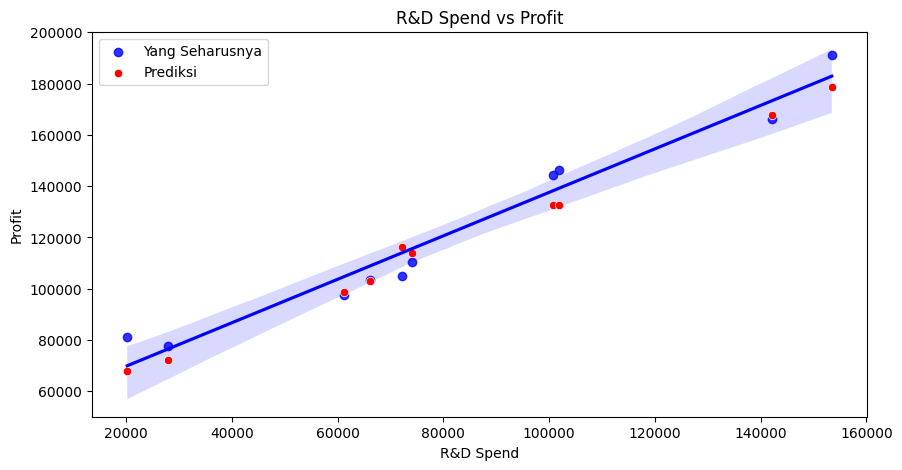

In [ ]:
plot_regression(X_test['R&D Spend'], y_test, y_pred, 'R&D Spend', 'R&D Spend vs Profit')

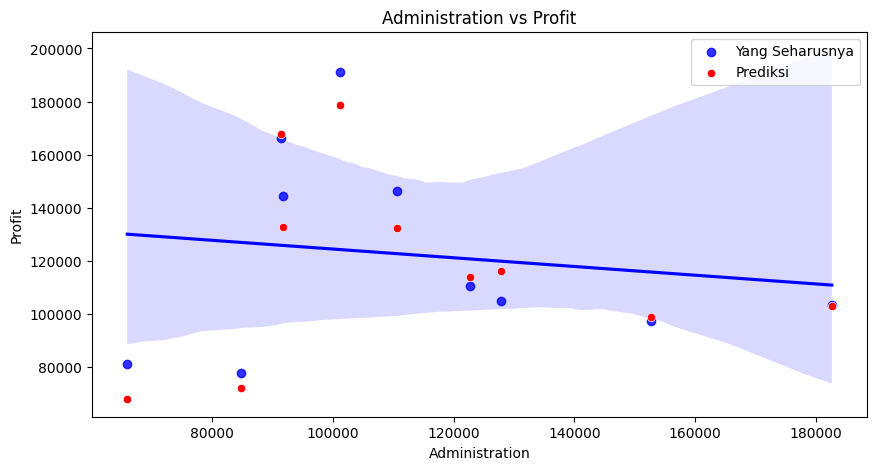

In [ ]:
plot_regression(X_test['Administration'], y_test, y_pred, 'Administration', 'Administration vs Profit')

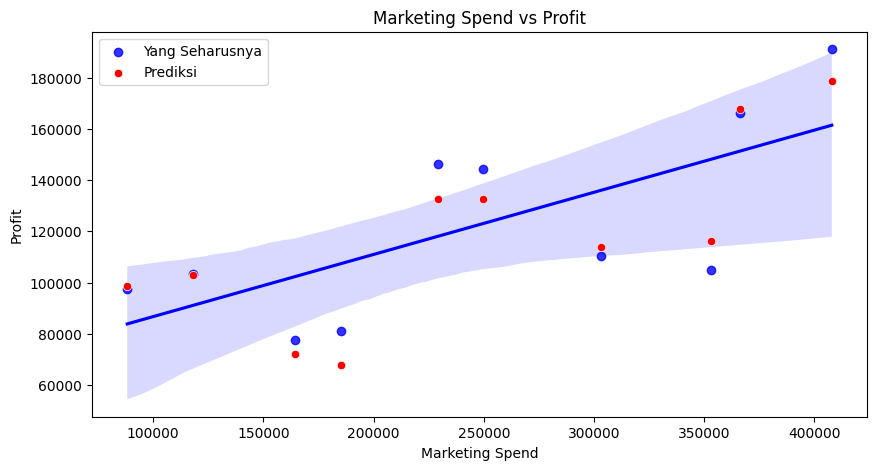

In [ ]:
plot_regression(X_test['Marketing Spend'], y_test, y_pred, 'Marketing Spend', 'Marketing Spend vs Profit')